# Importing The Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from sklearn.decomposition import PCA, TruncatedSVD, NMF, KernelPCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(42)

# Loading + Preprocessing The Image

In [3]:
astronaut = data.astronaut()
print(f"Original image shape: {astronaut.shape}")
print(f"Original image data type: {astronaut.dtype}")

Original image shape: (512, 512, 3)
Original image data type: uint8


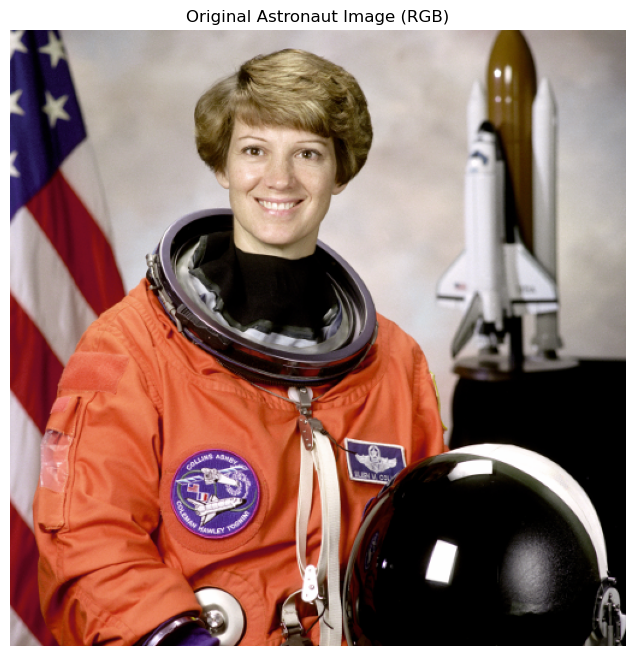

In [4]:
plt.figure(figsize=(8, 8))
plt.imshow(astronaut)
plt.title('Original Astronaut Image (RGB)')
plt.axis('off')
plt.show()

In [5]:
astronaut_gray = color.rgb2gray(astronaut)
print(f"Grayscale image shape: {astronaut_gray.shape}")
print(f"Grayscale image range: [{astronaut_gray.min():.4f}, {astronaut_gray.max():.4f}]")

Grayscale image shape: (512, 512)
Grayscale image range: [0.0000, 1.0000]


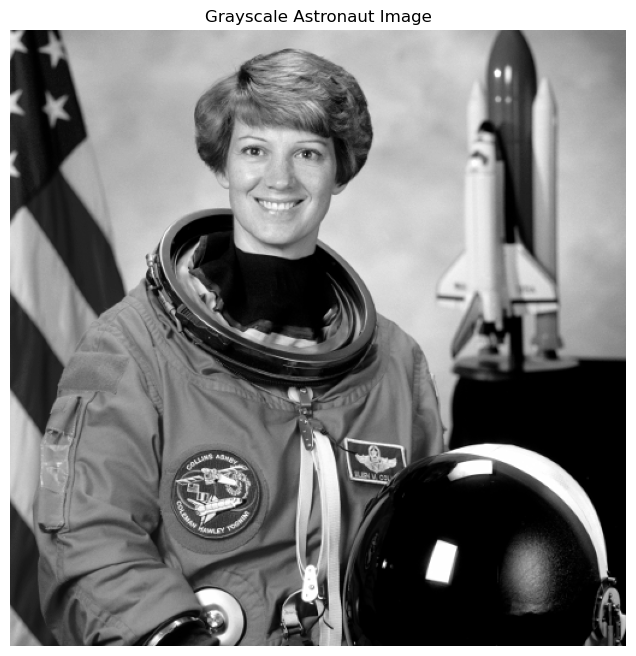

In [6]:
plt.figure(figsize=(8, 8))
plt.imshow(astronaut_gray, cmap='gray')
plt.title('Grayscale Astronaut Image')
plt.axis('off')
plt.show()

In [7]:
astronaut_flat = astronaut_gray.flatten().reshape(-1, 1)
scaler = MinMaxScaler()
astronaut_normalized = scaler.fit_transform(astronaut_flat)
astronaut_normalized_2d = astronaut_normalized.reshape(astronaut_gray.shape)

print(f"Normalized image range: [{astronaut_normalized.min():.4f}, {astronaut_normalized.max():.4f}]")

Normalized image range: [0.0000, 1.0000]


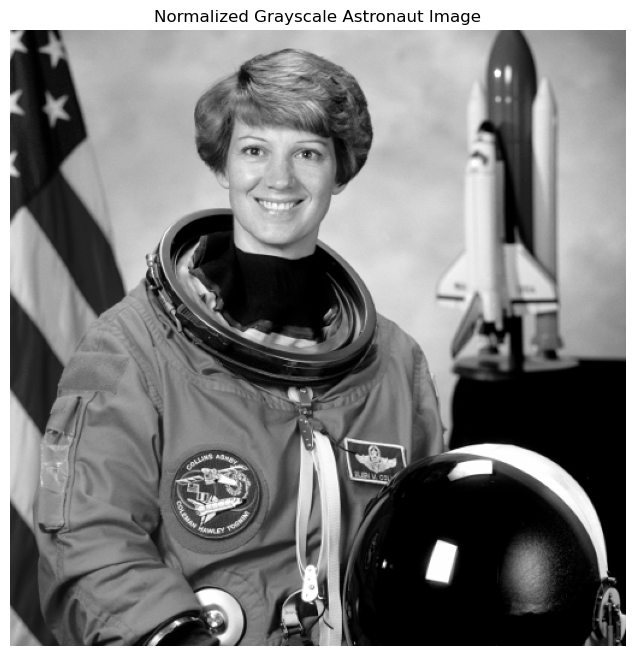

In [8]:
plt.figure(figsize=(8, 8))
plt.imshow(astronaut_normalized_2d, cmap='gray')
plt.title('Normalized Grayscale Astronaut Image')
plt.axis('off')
plt.show()

In [9]:
n_samples, n_features = astronaut_gray.shape
X = astronaut_normalized_2d

print(f"Image dimensions: {n_samples} x {n_features}")
print(f"Data matrix shape: {X.shape}")

Image dimensions: 512 x 512
Data matrix shape: (512, 512)


# Defining Prerequisites of DR Methods

In [10]:
k_values = [5, 20, 50, 100]

reconstructed_images = {
    'PCA': {},
    'Truncated SVD': {},
    'Kernel PCA (RBF)': {},
    'NMF': {}
}

mse_values = {
    'PCA': [],
    'Truncated SVD': [],
    'Kernel PCA (RBF)': [],
    'NMF': []
}

# Implementing PCA

In [11]:
for k in k_values:
    pca = PCA(n_components=k, random_state=42)
    
    X_pca = pca.fit_transform(X)
    
    X_reconstructed = pca.inverse_transform(X_pca)
    
    reconstructed_images['PCA'][k] = X_reconstructed
    
    mse = mean_squared_error(X, X_reconstructed)
    mse_values['PCA'].append(mse)
    
    print(f"  k={k}: MSE = {mse:.6f}")

  k=5: MSE = 0.021831
  k=20: MSE = 0.005913
  k=50: MSE = 0.001805
  k=100: MSE = 0.000509


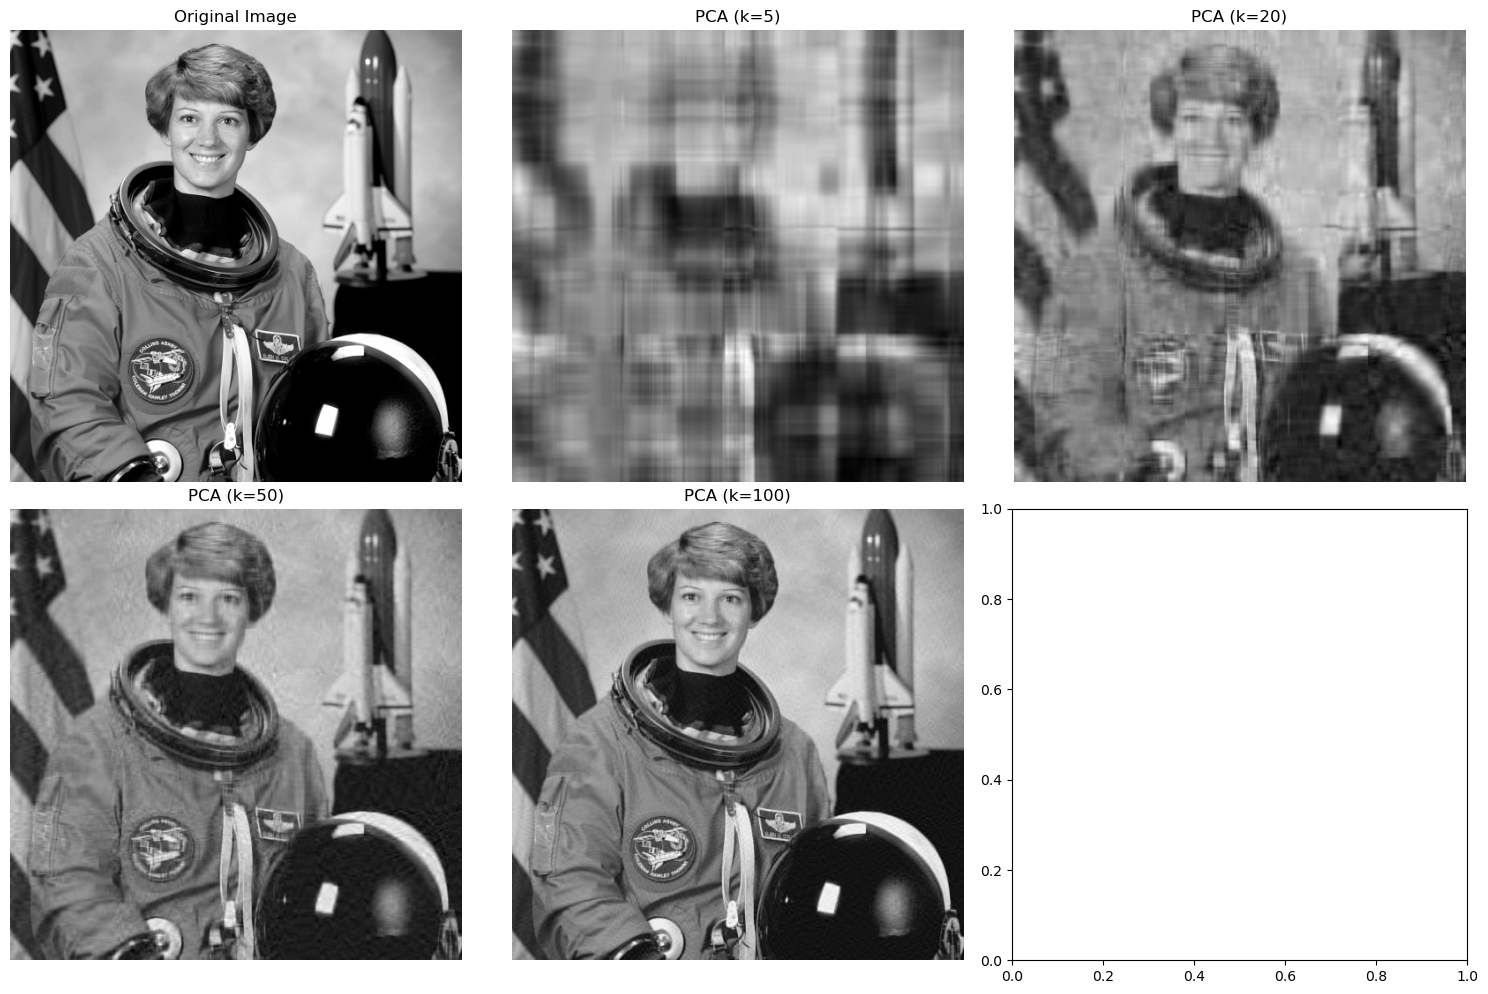

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

axes[0].imshow(X, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

for i, k in enumerate(k_values):
    axes[i+1].imshow(reconstructed_images['PCA'][k], cmap='gray')
    axes[i+1].set_title(f'PCA (k={k})')
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()

# Implementing Truncated SVD

In [13]:
for k in k_values:
    svd = TruncatedSVD(n_components=k, random_state=42)
    
    X_svd = svd.fit_transform(X)
    
    X_reconstructed = svd.inverse_transform(X_svd)
    
    reconstructed_images['Truncated SVD'][k] = X_reconstructed
    
    mse = mean_squared_error(X, X_reconstructed)
    mse_values['Truncated SVD'].append(mse)
    
    print(f"  k={k}: MSE = {mse:.6f}")

  k=5: MSE = 0.024051
  k=20: MSE = 0.006135
  k=50: MSE = 0.001841
  k=100: MSE = 0.000515


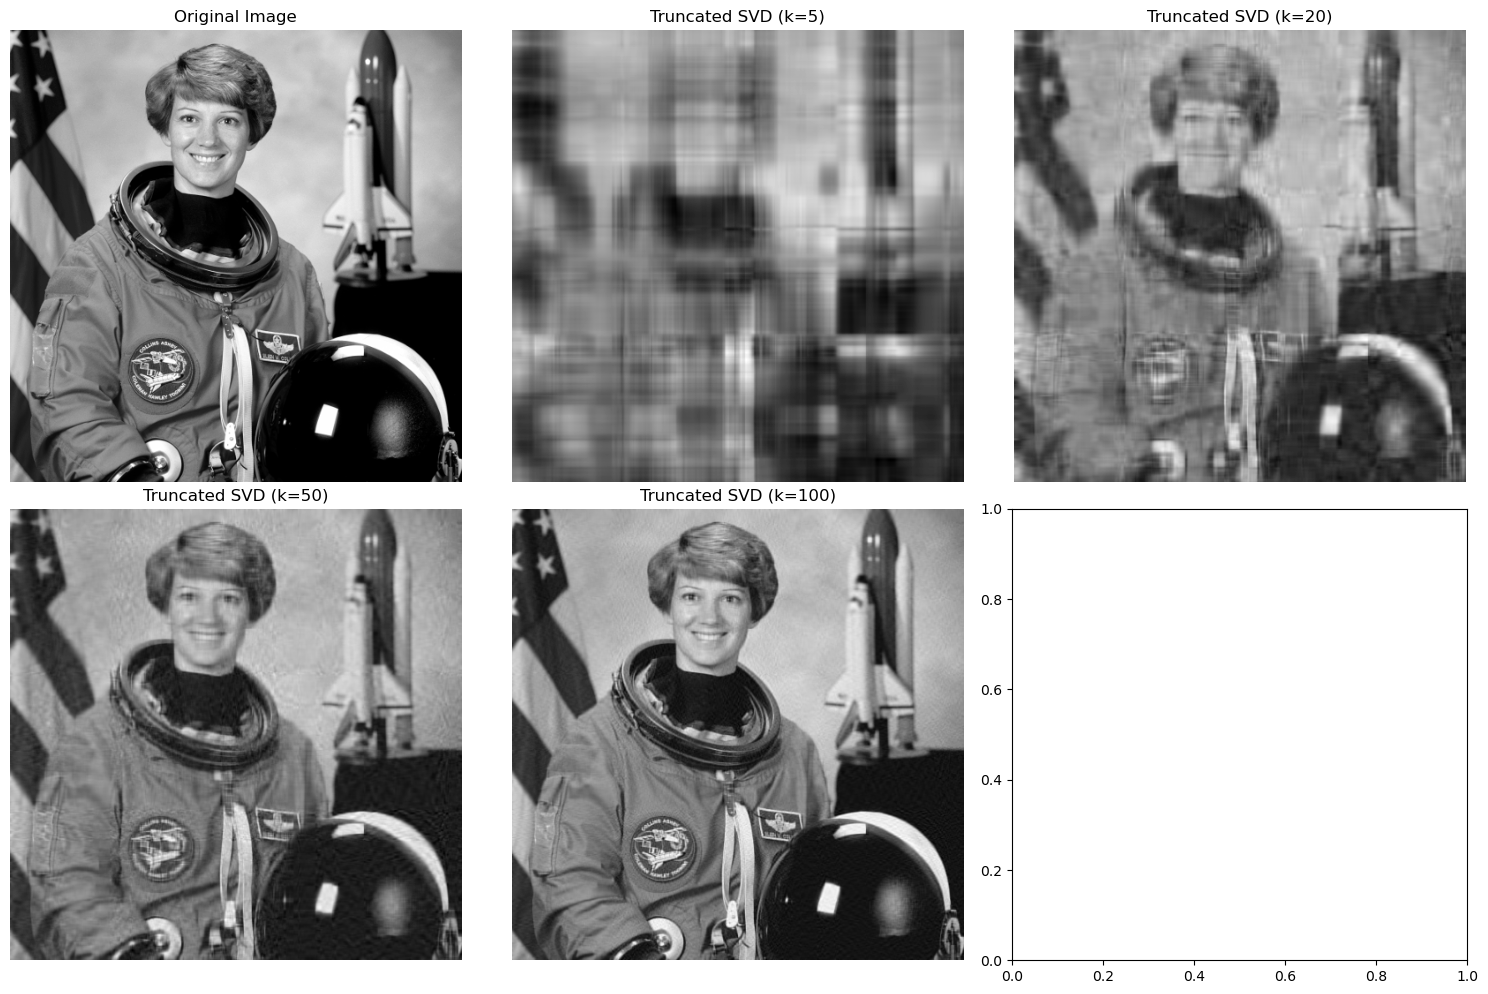

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

axes[0].imshow(X, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

for i, k in enumerate(k_values):
    axes[i+1].imshow(reconstructed_images['Truncated SVD'][k], cmap='gray')
    axes[i+1].set_title(f'Truncated SVD (k={k})')
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()